# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import zscore
from scipy.stats import linregress
#from config import api_key

# Import API key
#from api_keys import weather_api_key
import api_keys as api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [5]:
cities[380]
#api.openweathermap.org/data/2.5/weather?q=jacmel&APPID=7111648151b6cdb2d73c65bb4671e668

#{"coord":{"lon":-72.5347,"lat":18.2342},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],
    #"base":"stations","main":{"temp":304.15,"feels_like":307.51,"temp_min":304.15,"temp_max":304.15,"pressure":1015,
        #"humidity":58},"visibility":9000,"wind":{"speed":5.14,"deg":300},"clouds":{"all":20},"dt":1618420578,"sys":{"type":1,"id":7213,"country":"HT","sunrise":1618396431,"sunset":1618441583},"timezone":-14400,"id":3723779,"name":"Jacmel","cod":200}

'beringovskiy'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Weather key email: Please, use the endpoint api.openweathermap.org for your API calls
#Example of API call:
#api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=7111648151b6cdb2d73c65bb4671e668
url = "http://api.openweathermap.org/data/2.5/weather?"

city_results = []

unique_city = ["goba", "London"]

#enumerate = retrieves item and the position of the item. Index = position, city = name of the item
for index, city in enumerate(cities):
    city_weather_url = "{}q={}&APPID={}&units=imperial".format(url, city, api.weather_api_key)
    #print(city_weather_url)
    #either
    try:
        ##print to see what is available/ where I'm at in the code dev (don't do all the cities pick unique city/(s)). If code is good change back to cities
        print("Processing Record {} of Set {} | {}".format(index, len(cities), city))
        response = requests.get(city_weather_url).json()
        city_results.append(response)
    #or
    except:
        print("{} not found".format(city))

##print(city_results)
len(city_results)
    

Processing Record 0 of Set 623 | nanortalik
Processing Record 1 of Set 623 | turayf
Processing Record 2 of Set 623 | mount gambier
Processing Record 3 of Set 623 | rikitea
Processing Record 4 of Set 623 | tasiilaq
Processing Record 5 of Set 623 | kurilsk
Processing Record 6 of Set 623 | airai
Processing Record 7 of Set 623 | port-gentil
Processing Record 8 of Set 623 | karaman
Processing Record 9 of Set 623 | busselton
Processing Record 10 of Set 623 | ribeira brava
Processing Record 11 of Set 623 | oranjemund
Processing Record 12 of Set 623 | castro
Processing Record 13 of Set 623 | arraial do cabo
Processing Record 14 of Set 623 | bredasdorp
Processing Record 15 of Set 623 | tuktoyaktuk
Processing Record 16 of Set 623 | tual
Processing Record 17 of Set 623 | san patricio
Processing Record 18 of Set 623 | leningradskiy
Processing Record 19 of Set 623 | port alfred
Processing Record 20 of Set 623 | rabo de peixe
Processing Record 21 of Set 623 | new norfolk
Processing Record 22 of Set 

Processing Record 188 of Set 623 | birao
Processing Record 189 of Set 623 | goderich
Processing Record 190 of Set 623 | vaitupu
Processing Record 191 of Set 623 | mayo
Processing Record 192 of Set 623 | chifeng
Processing Record 193 of Set 623 | caconda
Processing Record 194 of Set 623 | port elizabeth
Processing Record 195 of Set 623 | lorengau
Processing Record 196 of Set 623 | sinkat
Processing Record 197 of Set 623 | ngama
Processing Record 198 of Set 623 | taicheng
Processing Record 199 of Set 623 | zhuanghe
Processing Record 200 of Set 623 | cidreira
Processing Record 201 of Set 623 | maragogi
Processing Record 202 of Set 623 | broome
Processing Record 203 of Set 623 | warri
Processing Record 204 of Set 623 | lasa
Processing Record 205 of Set 623 | natitingou
Processing Record 206 of Set 623 | najran
Processing Record 207 of Set 623 | agirish
Processing Record 208 of Set 623 | ratnagiri
Processing Record 209 of Set 623 | ust-nera
Processing Record 210 of Set 623 | campbell river


Processing Record 374 of Set 623 | chokurdakh
Processing Record 375 of Set 623 | san pedro
Processing Record 376 of Set 623 | luderitz
Processing Record 377 of Set 623 | orange
Processing Record 378 of Set 623 | srandakan
Processing Record 379 of Set 623 | san jose
Processing Record 380 of Set 623 | beringovskiy
Processing Record 381 of Set 623 | tabiauea
Processing Record 382 of Set 623 | krasnoselkup
Processing Record 383 of Set 623 | rio novo do sul
Processing Record 384 of Set 623 | mokrousovo
Processing Record 385 of Set 623 | tabukiniberu
Processing Record 386 of Set 623 | ancud
Processing Record 387 of Set 623 | upernavik
Processing Record 388 of Set 623 | columbus
Processing Record 389 of Set 623 | draper
Processing Record 390 of Set 623 | danshui
Processing Record 391 of Set 623 | kyra
Processing Record 392 of Set 623 | lazaro cardenas
Processing Record 393 of Set 623 | bethel
Processing Record 394 of Set 623 | prince rupert
Processing Record 395 of Set 623 | stokmarknes
Proce

Processing Record 560 of Set 623 | bababe
Processing Record 561 of Set 623 | dayong
Processing Record 562 of Set 623 | shirokiy
Processing Record 563 of Set 623 | amarwara
Processing Record 564 of Set 623 | mmathubudukwane
Processing Record 565 of Set 623 | siderno
Processing Record 566 of Set 623 | huarmey
Processing Record 567 of Set 623 | grand gaube
Processing Record 568 of Set 623 | kloulklubed
Processing Record 569 of Set 623 | mollendo
Processing Record 570 of Set 623 | dzaoudzi
Processing Record 571 of Set 623 | nome
Processing Record 572 of Set 623 | aflu
Processing Record 573 of Set 623 | muncar
Processing Record 574 of Set 623 | beidao
Processing Record 575 of Set 623 | verkhoyansk
Processing Record 576 of Set 623 | bambanglipuro
Processing Record 577 of Set 623 | grindavik
Processing Record 578 of Set 623 | chara
Processing Record 579 of Set 623 | ngukurr
Processing Record 580 of Set 623 | wabana
Processing Record 581 of Set 623 | sulangan
Processing Record 582 of Set 623 |

623

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [244]:
#new loop on the city_results 
table_results = []

bad_results = []

#{"coord":{"lon":-70.9167,"lat":-53.15},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],
#"base":"stations","main":{"temp":278.92,"feels_like":273.82,"temp_min":278.71,"temp_max":279.15,"pressure":993,"humidity":81},
#"visibility":10000,"wind":{"speed":9.77,"deg":300,"gust":14.92},"clouds":{"all":75},"dt":1618435659,
#"sys":{"type":1,"id":8487,"country":"CL","sunrise":1618399788,"sunset":1618437449},
#"timezone":-10800,"id":3874787,"name":"Punta Arenas","cod":200}


for result in city_results:
   #if "name" in result:
    if int(result["cod"]) == 200:     
        city_name = result["name"]
        city_latitude = result["coord"]["lat"]
        city_longitude = result["coord"]["lon"]
        city_maxtemp = result["main"]["temp_max"]
        city_humidity = result["main"]["humidity"]
        city_cloud = result["clouds"]["all"]
        city_wind = result["wind"]["speed"]
        city_country = result["sys"]["country"]
        city_date = result["dt"]
        #create a dictionary with the items
        city_dict = {
            "City": city_name, 
            "Lat": city_latitude, 
            "Lng": city_longitude, 
            "Max Temp": city_maxtemp, 
            "Humidity": city_humidity, 
            "Cloudiness": city_cloud, 
            "Wind Speed": city_wind, 
            "Country": city_country, 
            "Date": city_date
        }
        table_results.append(city_dict)
    
    else: 
        bad_results.append(result)
        
len(table_results)
#bad_results[0]

table_results_df = pd.DataFrame(table_results)
table_results_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,39.20,87,0,10.36,CL,1618453749
1,Fairbanks,64.8378,-147.7164,46.40,56,90,6.91,US,1618453479
2,Kapaa,22.0752,-159.3190,78.80,57,20,16.11,US,1618453749
3,Mataura,-46.1927,168.8643,62.01,73,38,5.99,NZ,1618453750
4,Coquimbo,-29.9533,-71.3436,59.00,88,90,1.14,CL,1618453463
...,...,...,...,...,...,...,...,...,...
533,Hualmay,-11.0964,-77.6139,66.56,85,86,7.09,PE,1618453972
534,Esmeraldas,-19.7625,-44.3139,68.00,68,0,11.50,BR,1618453840
535,Gayéri,12.6497,0.4931,86.11,26,56,4.83,BF,1618453972
536,Pindi Bhattian,31.8978,73.2730,82.72,29,93,10.13,PK,1618453972


In [355]:
#export to csv
table_results_df.to_csv('city_weather.csv')

In [356]:
#describe only works on numeric columns
table_results_df.describe()
#table_results_df.value_counts()
#table_results_df["Max Temp"].value_counts()
#table_results_df.info()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,21.619014,16.127382,57.629926,68.091078,52.459108,7.901989,1.618454e+09
std,33.895367,90.498884,21.328226,23.254664,38.267013,5.730605,9.039720e+01
min,-54.800000,-179.166700,-14.120000,6.000000,0.000000,0.250000,1.618453e+09
25%,-8.114325,-62.793350,42.090000,55.000000,15.000000,3.675000,1.618454e+09
50%,29.435250,18.974900,60.745000,73.500000,54.500000,6.540000,1.618454e+09
75%,50.543525,95.926925,75.480000,87.000000,90.000000,10.405000,1.618454e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,38.990000,1.618454e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#homework example - don't run code

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [357]:
#look for cities and humidity - check to see if there are any cities with humidity less than 100%
table_results_df.Humidity.value_counts()

88    23
94    20
93    17
81    16
71    15
      ..
35     1
24     1
44     1
41     1
6      1
Name: Humidity, Length: 90, dtype: int64

In [359]:
#table_results_df.value_counts()
#table_results_df.info()

#Inspect the data and remove the cities where the humidity > 100%.
table_results_df[table_results_df.Humidity <= 100].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,21.619014,16.127382,57.629926,68.091078,52.459108,7.901989,1.618454e+09
std,33.895367,90.498884,21.328226,23.254664,38.267013,5.730605,9.039720e+01
min,-54.800000,-179.166700,-14.120000,6.000000,0.000000,0.250000,1.618453e+09
25%,-8.114325,-62.793350,42.090000,55.000000,15.000000,3.675000,1.618454e+09
50%,29.435250,18.974900,60.745000,73.500000,54.500000,6.540000,1.618454e+09
75%,50.543525,95.926925,75.480000,87.000000,90.000000,10.405000,1.618454e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,38.990000,1.618454e+09


In [360]:
#  Get the indices of cities that have humidity over 100%.
#table_results_df.Humidity.index
table_results_df[table_results_df.Humidity >= 100].index

Int64Index([9, 100, 125, 171, 195, 199, 235, 323, 445, 459, 506], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#DON'T RUN THIS CODE - HOMEWORK EXAMPLE

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [361]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#no_outliers_df = table_results_df(np.random.randn(538, 3))
#no_outliers_df
                              
#table_results_df[(np.abs(stats.zscore(table_results_df.Humidity)) < 3)]
#z_scipy = stats.zscore(table_results_df.Humidity)
#z_scipy
    
quartiles = table_results_df.Humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#outlier_humidity = table_results_df.loc[(table_results_df.Humidity < lower_bound) | (table_results_df.Humidity > upper_bound)]
#outlier_humidity

The lower quartile of humidity is: 55.0
The upper quartile of humidity is: 87.0
The interquartile range of humidity is: 32.0
The the median of humidity is: 73.5 
Values below 7.0 could be outliers.
Values above 135.0 could be outliers.


In [362]:
no_outliers_df = table_results_df[(table_results_df.Humidity > lower_bound) & (table_results_df.Humidity < upper_bound)]
no_outliers_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,39.20,87,0,10.36,CL,1618453749
1,Fairbanks,64.8378,-147.7164,46.40,56,90,6.91,US,1618453479
2,Kapaa,22.0752,-159.3190,78.80,57,20,16.11,US,1618453749
3,Mataura,-46.1927,168.8643,62.01,73,38,5.99,NZ,1618453750
4,Coquimbo,-29.9533,-71.3436,59.00,88,90,1.14,CL,1618453463
...,...,...,...,...,...,...,...,...,...
533,Hualmay,-11.0964,-77.6139,66.56,85,86,7.09,PE,1618453972
534,Esmeraldas,-19.7625,-44.3139,68.00,68,0,11.50,BR,1618453840
535,Gayéri,12.6497,0.4931,86.11,26,56,4.83,BF,1618453972
536,Pindi Bhattian,31.8978,73.2730,82.72,29,93,10.13,PK,1618453972


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

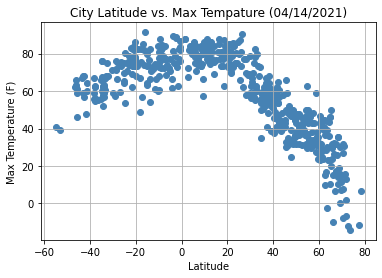

In [447]:
plt.scatter(table_results_df.Lat, table_results_df["Max Temp"], marker="o", color="steelblue") #4472C4
plt.title("City Latitude vs. Max Tempature (04/14/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Weather.png")
plt.show()

## Latitude vs. Temperature Analytics
Shows strong, non-linear correlation between latitude and max tempatures. 
Cities with latitudes between -20 & 20 have the hottest weather, these cities are closest to the equator. 

## Latitude vs. Humidity Plot

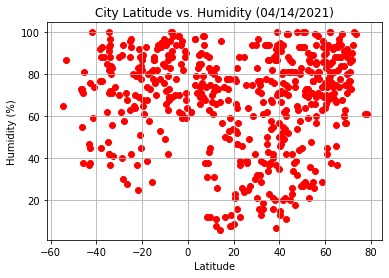

In [448]:
plt.scatter(table_results_df.Lat, table_results_df.Humidity, marker="o", color="r")
plt.title("City Latitude vs. Humidity (04/14/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Humidity.png")
plt.show()

## Latitude vs. Humidity Analytics
Shows no correlation between latitude and humidity %. 
Cities all over the globe can have high or low humidity regardless of latitude 

## Latitude vs. Cloudiness Plot

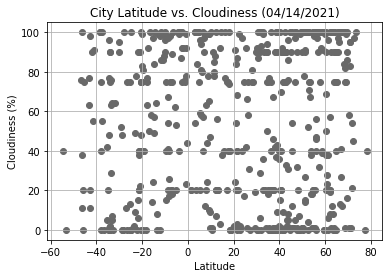

In [449]:
plt.scatter(table_results_df.Lat, table_results_df.Cloudiness, marker="o", color="dimgray")
plt.title("City Latitude vs. Cloudiness (04/14/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_Cloud.png")
plt.show()

## Latitude vs. Cloudiness Analytics
Shows no correlation between latitude and cloudiness %. Cities all over the globe can have high or low cloudiness regardless of latitude. 

## Latitude vs. Wind Speed Plot

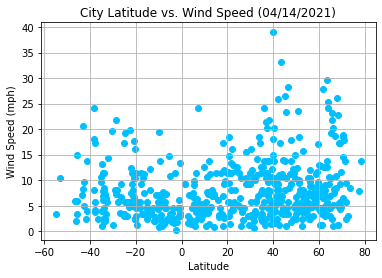

In [450]:
plt.scatter(table_results_df.Lat, table_results_df["Wind Speed"], marker="o", color="deepskyblue")
plt.title("City Latitude vs. Wind Speed (04/14/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_wind.png")
plt.show()

## Latitude vs. Wind Speed Analytics
There is no correlation between latitude and wind speed. Cities all over the globe can have high or low wind speed regardless of latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [406]:
north_df = table_results_df[table_results_df.Lat >= 0]
north_df
correlation = round(stats.pearsonr(north_df.Lat,north_df["Max Temp"])[0],2)
print(f"The correlation between latitude and max temp is {correlation}")

The correlation between latitude and max temp is -0.9


In [407]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(north_df.Lat,north_df["Max Temp"])

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = -1.0287968289196485
Intercept = 93.76927056377221
Regress Value = -0.8979366614988007
Pvalue = 1.1831197176588629e-134
Standard Deviation = 0.026144972293560362


The r-squared is: 0.8062902480636118


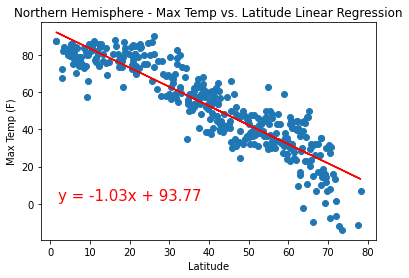

In [408]:
# equation of line to calculate predicted weight
fit = slope * north_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df.Lat, north_df["Max Temp"])
plt.plot(north_df.Lat,fit, "r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(2,2), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_max_temp.png")
plt.show()

## North Max Temp Analytics
XX

In [385]:
#regression(north_df.Lat,nort_df["Max Temp"])
#def regression(north_df.Lat, nort_df["Max Temp"]):
    #(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df.Lat,nort_df["Max Temp"])
    #regress_values = north_df.Lat * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.plot(north_df.Lat,nort_df["Max Temp"],"r-")
    #plt.scatter(north_df.Lat,nort_df["Max Temp"])
    


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [409]:
south_df = table_results_df[table_results_df.Lat <= 0]
south_df
correlation = round(stats.pearsonr(south_df.Lat,south_df["Max Temp"])[0],2)
print(f"The correlation between latitude and max temp is {correlation}")

The correlation between latitude and max temp is 0.63


In [410]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(south_df.Lat,south_df["Max Temp"])

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = 0.4784423453221438
Intercept = 81.0555918483034
Regress Value = 0.6323039756625369
Pvalue = 1.0794058828490426e-19
Standard Deviation = 0.046056526074154766


The r-squared is: 0.3998083176386501


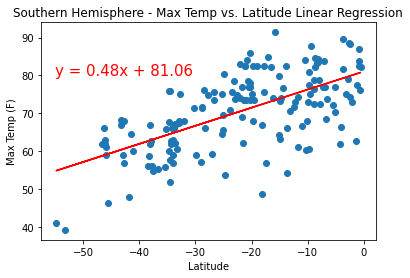

In [411]:
# equation of line to calculate predicted weight
fit = slope * south_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df.Lat, south_df["Max Temp"])
plt.plot(south_df.Lat,fit, "r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(line_eq,(-55,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_max_temp.png")
plt.show()

## South Max Temp Analytics
XX

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [412]:
correlation = round(stats.pearsonr(north_df.Lat, north_df.Humidity)[0],2)
print(f"The correlation between latitude and humidity is {correlation}")

The correlation between latitude and humidity is 0.24


In [413]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(north_df.Lat,north_df.Humidity)

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = 0.3022049628441326
Intercept = 52.98648399888883
Regress Value = 0.23979864302609294
Pvalue = 2.7243830582544185e-06
Standard Deviation = 0.06343417552291108


The r-squared is: 0.05750338919715555


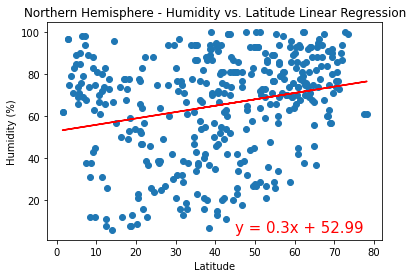

In [414]:
# equation of line to calculate predicted weight
fit = slope * north_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df.Lat, north_df.Humidity)
plt.plot(north_df.Lat,fit, "r-")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(line_eq,(45,5), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_humid.png")
plt.show()

## North Humidity Analytics
XX

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [415]:
correlation = round(stats.pearsonr(south_df.Lat, south_df.Humidity)[0],2)
print(f"The correlation between latitude and humidity is {correlation}")

The correlation between latitude and humidity is 0.23


In [416]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(south_df.Lat, south_df.Humidity)

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = 0.3128799760713196
Intercept = 81.33712559545225
Regress Value = 0.22983925768330454
Pvalue = 0.0030703541303243667
Standard Deviation = 0.1040904573762244


The r-squared is: 0.052826084372412464


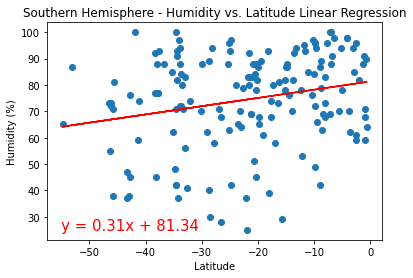

In [417]:
# equation of line to calculate predicted weight
fit = slope * south_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df.Lat, south_df.Humidity)
plt.plot(south_df.Lat,fit, "r-")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(line_eq,(-55,25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_humid.png")
plt.show()

## South Humidity Analytics
XX

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [422]:
correlation = round(stats.pearsonr(north_df.Lat, north_df.Cloudiness)[0],2)
print(f"The correlation between latitude and humidity is {correlation}")

The correlation between latitude and humidity is 0.05


In [423]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(north_df.Lat,north_df.Cloudiness)

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = 0.09757690069204276
Intercept = 48.112329229287894
Regress Value = 0.04896548664338679
Pvalue = 0.34499378537676006
Standard Deviation = 0.1031963206101318


The r-squared is: 0.00239761888222369


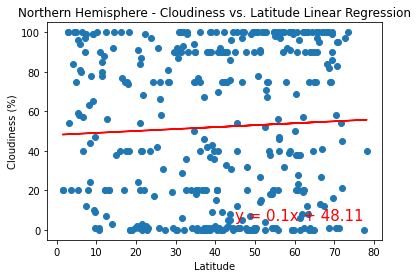

In [424]:
# equation of line to calculate predicted weight
fit = slope * north_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df.Lat, north_df.Cloudiness)
plt.plot(north_df.Lat,fit, "r-")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(line_eq,(45,5), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_cloud.png")
plt.show()

## North Cloudiness Analytics
XX

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [432]:
correlation = round(stats.pearsonr(south_df.Lat, south_df.Cloudiness)[0],2)
print(f"The correlation between latitude and humidity is {correlation}")

The correlation between latitude and humidity is 0.25


In [433]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(south_df.Lat,south_df.Cloudiness)

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = 0.6904460424468315
Intercept = 68.38404581413646
Regress Value = 0.25084189426839715
Pvalue = 0.0011964289554980355
Standard Deviation = 0.2093438063273361


The r-squared is: 0.06292165592015773


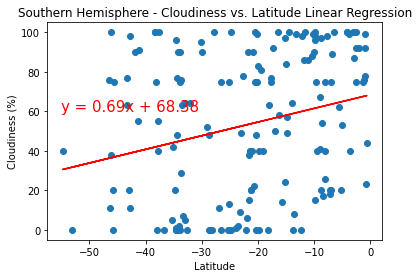

In [434]:
# equation of line to calculate predicted weight
fit = slope * south_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df.Lat, south_df.Cloudiness)
plt.plot(south_df.Lat,fit, "r-")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(line_eq,(-55,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_cloud.png")

plt.show()

## South Cloudiness Analytics
XX

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [441]:
correlation = round(stats.pearsonr(north_df.Lat, north_df["Wind Speed"])[0],2)
print(f"The correlation between latitude and wind speed is {correlation}")

The correlation between latitude and wind speed is 0.17


In [442]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(north_df.Lat,north_df["Wind Speed"])

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = 0.05311554835960756
Intercept = 6.2344313201467365
Regress Value = 0.17306550953722644
Pvalue = 0.0007762677857017561
Standard Deviation = 0.015672430773180035


The r-squared is: 0.029951670591379813


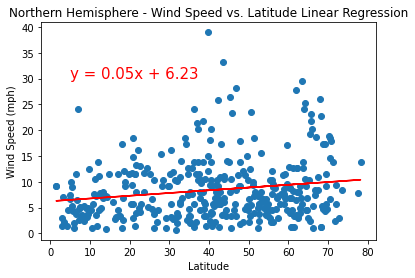

In [443]:
# equation of line to calculate predicted weight
fit = slope * north_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_df.Lat, north_df["Wind Speed"])
plt.plot(north_df.Lat,fit, "r-")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(line_eq,(5,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("north_wind.png")
plt.show()

## North Wind Speed Analytics
XX

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [444]:
correlation = round(stats.pearsonr(south_df.Lat, south_df["Wind Speed"])[0],2)
print(f"The correlation between latitude and wind speed is {correlation}")

The correlation between latitude and wind speed is -0.23


In [445]:
slope, intercept, rvalue, pvalue, std_err = stats.linregress(south_df.Lat,south_df["Wind Speed"])

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = -0.08363214851396153
Intercept = 4.954917996534512
Regress Value = -0.22845146154943963
Pvalue = 0.003258483952118045
Standard Deviation = 0.028001573275766328


The r-squared is: 0.052190070284075095


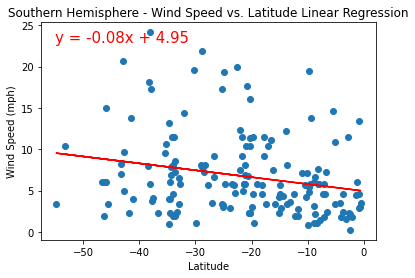

In [446]:
# equation of line to calculate predicted weight
fit = slope * south_df.Lat + intercept
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_df.Lat, south_df["Wind Speed"])
plt.plot(south_df.Lat,fit, "r-")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(line_eq,(-55,23), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("south_wind.png")
plt.show()

## South Wind Speed Analytics
XX